In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Passanger Satisfaction 2024/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Passanger Satisfaction 2024/test.csv')

In [ ]:
df['Satisfaction'].unique()
df['Satisfaction'] = df['Satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)

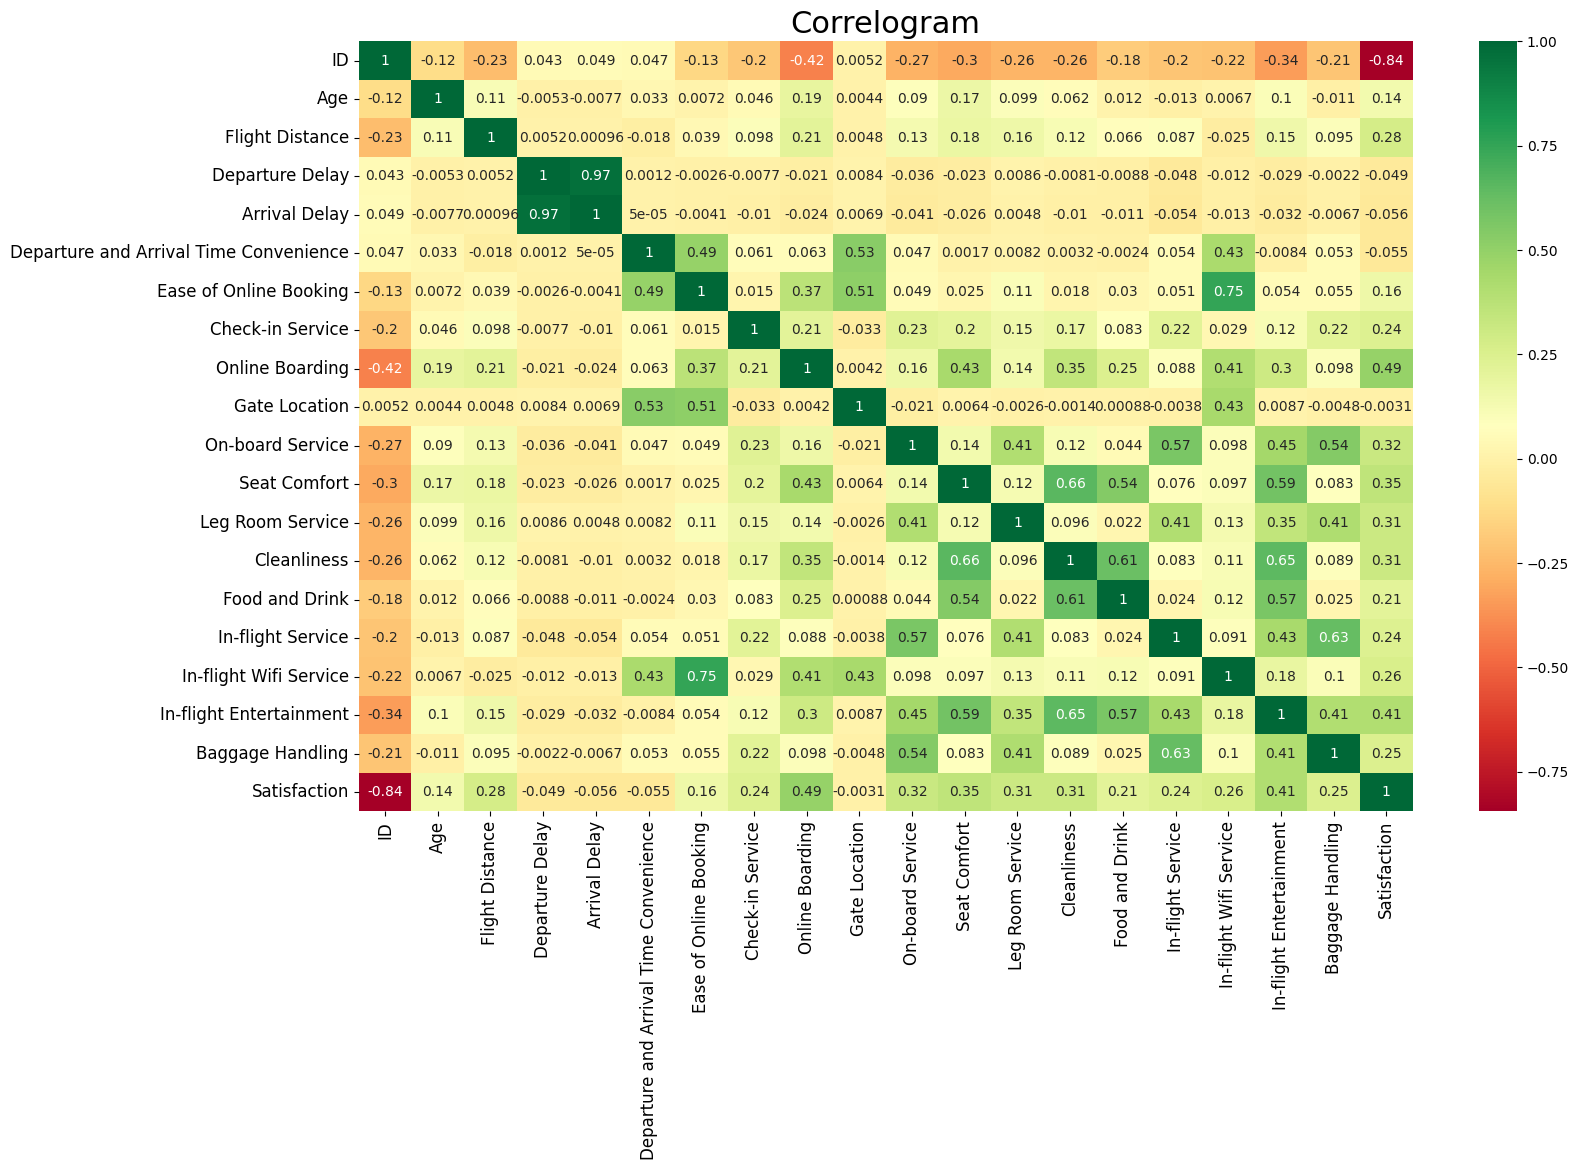

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns

import seaborn as sns
plt.figure(figsize=(17,10))
num = df.select_dtypes(include =['number'])
sns.heatmap(num.corr(), cmap='RdYlGn', annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df = df.drop(['Departure and Arrival Time Convenience', 'Arrival Delay', 'Departure Delay', 'Gate Location'], axis=1)

In [ ]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Ease of Online Booking,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,1,5,4,5,5,5,3,2,5,1,5,5,1
1,56913,Male,30,Returning,Business,Business,1379,5,1,1,3,1,5,1,1,3,1,1,3,0
2,6541,Female,50,Returning,Business,Business,414,4,4,4,4,5,4,5,3,4,5,4,4,1
3,40646,Female,48,Returning,Business,Economy,95,3,1,2,5,1,5,2,1,5,5,5,5,1
4,29947,Female,24,Returning,Business,Economy Plus,143,0,4,0,5,1,2,1,1,3,0,1,5,1


In [ ]:
df_test.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,...,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,...,4,2,4,2,3,1,2,2,2,2


In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Ease of Online Booking,0
Check-in Service,0
Online Boarding,0


In [ ]:
df_test.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,131
Departure and Arrival Time Convenience,0


In [ ]:
# Пропуски есть только в 'Arrival Delay', поэтому проверим, зависит ли задержка вылета от задержки прилета

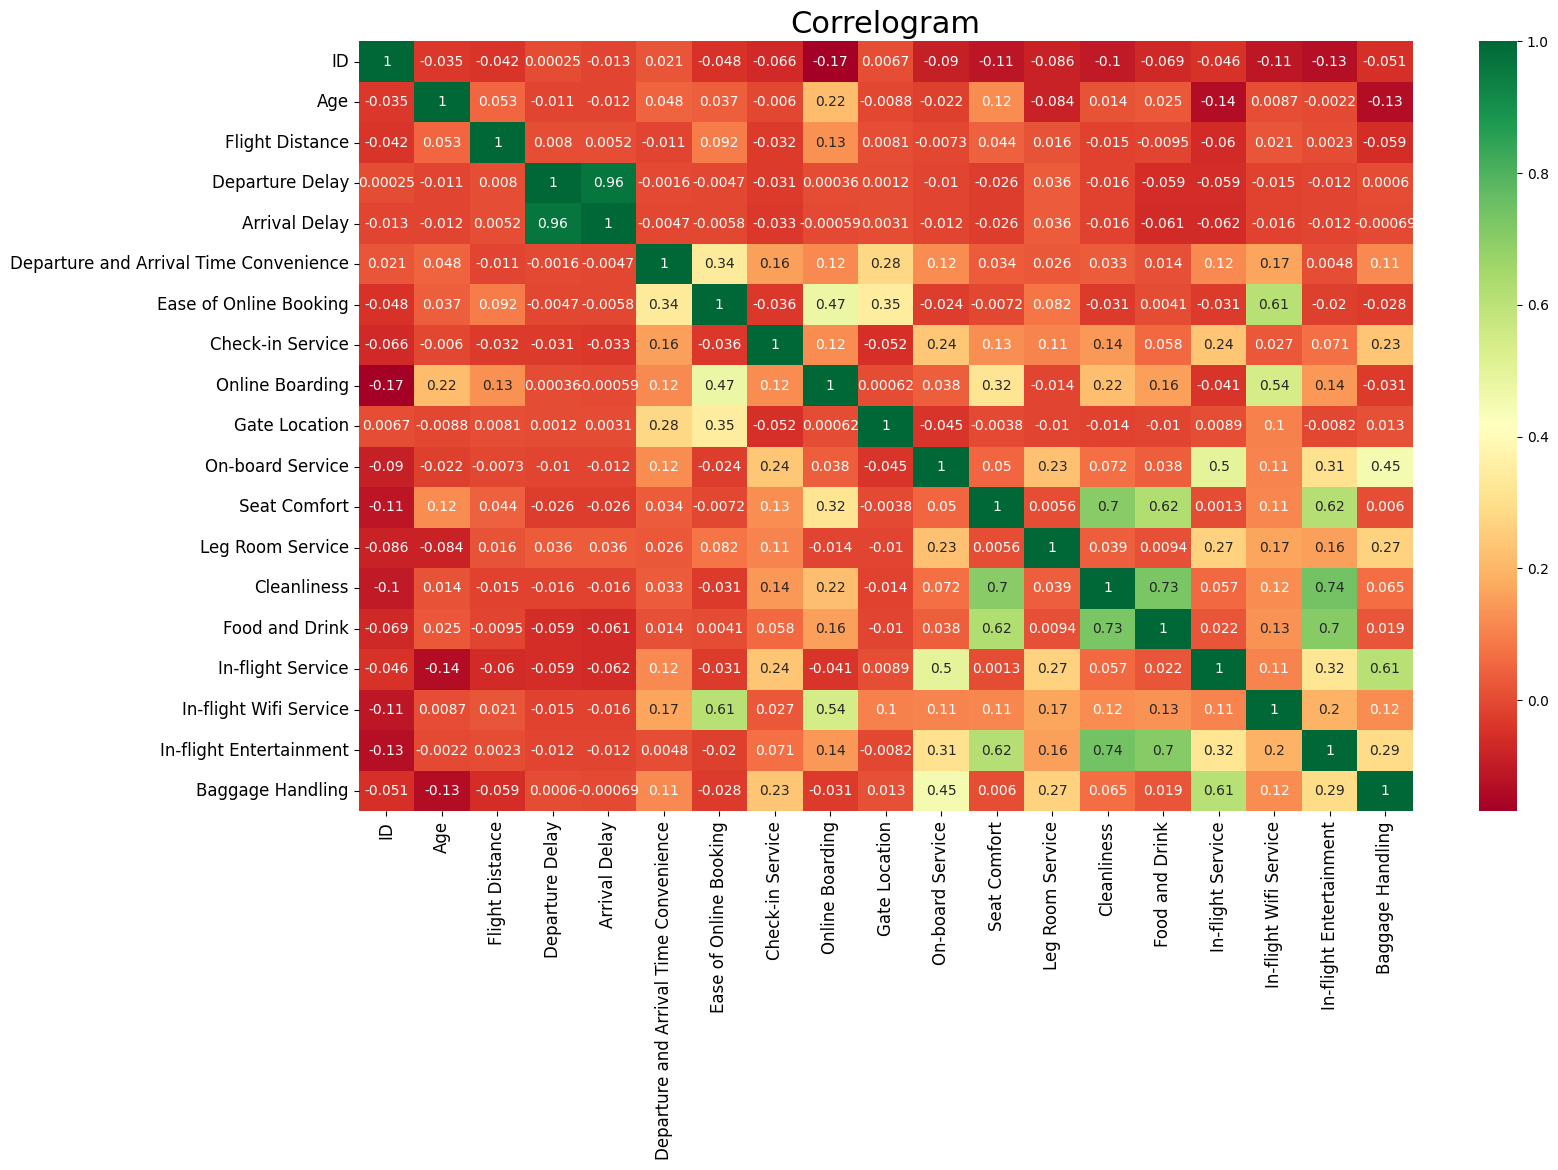

In [ ]:
numerical_cols = df_test.select_dtypes(include=['number']).columns

import seaborn as sns
plt.figure(figsize=(17,10))
num = df_test.select_dtypes(include =['number'])
sns.heatmap(num.corr(), cmap='RdYlGn', annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Видим что корелляция равна 0.96, поэтому заменим пропуски в задержке прилета на время задержки вылета

In [ ]:
df_test['Arrival Delay'] = df_test['Arrival Delay'].fillna(df_test['Departure Delay'])

In [ ]:
df_test.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


In [ ]:
for i in [df, df_test]:
  for col in i.columns:
      if i[col].dtype == 'object': #обработка для строковых колонок
          mode = i[col].mode()[0]
          i[col] = i[col].fillna(mode)

      elif pd.api.types.is_numeric_dtype(i[col]): # обработка для числовых колонок
        mode = i[col].mode()[0]
        i[col] = i[col].fillna(mode)

In [ ]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
#df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#df_test = pd.get_dummies(df_test, columns=categorical_cols)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(mapping)

In [ ]:
df['Customer Type'].unique()

array(['Returning', 'First-time'], dtype=object)

In [ ]:
mapping = {'Returning': 0, 'First-time': 1}
df['Customer Type'] = df['Customer Type'].map(mapping)

In [ ]:
df['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

In [ ]:
mapping = {'Business': 0, 'Personal': 1}
df['Type of Travel'] = df['Type of Travel'].map(mapping)

In [ ]:
df['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [ ]:
mapping = {'Business': 0, 'Economy': 1, 'Economy Plus': 2}
df['Class'] = df['Class'].map(mapping)

In [ ]:
mapping = {'Male': 0, 'Female': 1}
df_test['Gender'] = df_test['Gender'].map(mapping)

mapping = {'Returning': 0, 'First-time': 1}
df_test['Customer Type'] = df_test['Customer Type'].map(mapping)

mapping = {'Business': 0, 'Personal': 1}
df_test['Type of Travel'] = df_test['Type of Travel'].map(mapping)

mapping = {'Business': 0, 'Economy': 1, 'Economy Plus': 2}
df_test['Class'] = df_test['Class'].map(mapping)

In [ ]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Ease of Online Booking,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,0,46,0,0,0,1608,1,5,4,5,5,5,3,2,5,1,5,5,1
1,56913,0,30,0,0,0,1379,5,1,1,3,1,5,1,1,3,1,1,3,0
2,6541,1,50,0,0,0,414,4,4,4,4,5,4,5,3,4,5,4,4,1
3,40646,1,48,0,0,1,95,3,1,2,5,1,5,2,1,5,5,5,5,1
4,29947,1,24,0,0,2,143,0,4,0,5,1,2,1,1,3,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,53730,0,49,1,0,0,1310,3,3,4,4,3,2,3,3,4,4,3,4,0
84963,82113,0,7,0,1,2,650,2,2,2,2,1,4,1,1,4,2,1,3,0
84964,54411,1,19,0,1,1,363,3,5,3,5,5,3,5,5,5,3,5,5,0
84965,15247,0,58,0,0,0,3445,1,3,4,5,5,5,3,5,5,1,5,5,1


In [ ]:
common_cols = df.columns.intersection(df_test.columns)
y = df['Satisfaction']
df = df[list(common_cols)]
df_test = df_test[list(common_cols)]

df = df.drop('ID', axis=1)
ID_test = df_test['ID']
df_test = df_test.drop('ID', axis=1)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Ease of Online Booking', 'Check-in Service',
       'Online Boarding', 'On-board Service', 'Seat Comfort',
       'Leg Room Service', 'Cleanliness', 'Food and Drink',
       'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [ ]:
df_test.columns


Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Ease of Online Booking', 'Check-in Service',
       'Online Boarding', 'On-board Service', 'Seat Comfort',
       'Leg Room Service', 'Cleanliness', 'Food and Drink',
       'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [ ]:
'''scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_test_scaled = scaler.transform(test)'''

'scaler = StandardScaler()\ndf_scaled = scaler.fit_transform(df)\ndf_test_scaled = scaler.transform(test)'

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_test_scaled = scaler.transform(df_test)

In [ ]:
df_test_scaled

array([[1.        , 0.5       , 1.        , ..., 0.6       , 1.        ,
        0.25      ],
       [1.        , 0.17948718, 1.        , ..., 0.2       , 0.8       ,
        0.75      ],
       [1.        , 0.41025641, 0.        , ..., 0.2       , 0.6       ,
        1.        ],
       ...,
       [0.        , 0.55128205, 0.        , ..., 0.2       , 0.2       ,
        0.        ],
       [1.        , 0.53846154, 1.        , ..., 0.4       , 0.6       ,
        0.75      ],
       [1.        , 0.51282051, 0.        , ..., 0.4       , 0.6       ,
        0.5       ]])

In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(df_scaled, y)

Y_pred = model.predict(df_test_scaled)


kf = KFold(n_splits=3, shuffle=True, random_state=42)

scores_accuracy = cross_val_score(model, df_scaled, y, cv=kf, scoring='accuracy') # Доля правильных ответов

scores_precision = cross_val_score(model, df_scaled, y, cv=kf, scoring='precision') # Точность

scores_recall = cross_val_score(model, df_scaled, y, cv=kf, scoring='recall') # Полнота

scores_f1 = cross_val_score(model, df_scaled, y, cv=kf, scoring='f1')


print(scores_accuracy.mean(), scores_precision.mean(), scores_recall.mean(), scores_f1.mean())

0.9535113479856969 0.9655908952132449 0.9580489663518068 0.9618027888206407


In [ ]:
'''from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

model.fit(df_scaled, y)

Y_pred = model.predict(df_test_scaled)


kf = KFold(n_splits=3, shuffle=True, random_state=42)

scores_accuracy = cross_val_score(model, df_scaled, y, cv=kf, scoring='accuracy')

scores_precision = cross_val_score(model, df_scaled, y, cv=kf, scoring='precision')

scores_recall = cross_val_score(model, df_scaled, y, cv=kf, scoring='recall')

scores_f1 = cross_val_score(model, df_scaled, y, cv=kf, scoring='f1')


print(scores_accuracy.mean(), scores_precision.mean(), scores_recall.mean(), scores_f1.mean())'''

"from sklearn.linear_model import LogisticRegression\n\nmodel = LogisticRegression(random_state=42)\n\nmodel.fit(df_scaled, y)\n\nY_pred = model.predict(df_test_scaled)\n\n\nkf = KFold(n_splits=3, shuffle=True, random_state=42)\n\nscores_accuracy = cross_val_score(model, df_scaled, y, cv=kf, scoring='accuracy')\n\nscores_precision = cross_val_score(model, df_scaled, y, cv=kf, scoring='precision')\n\nscores_recall = cross_val_score(model, df_scaled, y, cv=kf, scoring='recall')\n\nscores_f1 = cross_val_score(model, df_scaled, y, cv=kf, scoring='f1')\n\n\nprint(scores_accuracy.mean(), scores_precision.mean(), scores_recall.mean(), scores_f1.mean())"

In [ ]:
Y_pred = pd.DataFrame(Y_pred)
Y_pred.columns = ['Datisfaction']
res = pd.concat([ID_test, Y_pred], axis=1)
res

,ID,Datisfaction
0,98190,0
1,107961,0
2,129503,0
3,92408,0
4,117611,0
...,...,...
44908,117154,0
44909,101603,0
44910,105970,0
44911,89524,0


In [ ]:
res.to_csv("answer.csv", index=False)